# Лабораторная №1. Основый предобработки данных 

Используйте файл своей группы. <br>
Загрузите его в DataFrame и ответьте на вопросы, используя инстурменты из файла preprocessing.ipynb.


#### Воспросы
1. В какой шкале представлены все признаки в наборе?<br>
2. Укажите признак с наименьшей дисперсией.<br>
3. Среднее какого признака отличается для двух классов сильнее всего?<br>
4. В каком классе больше всего skilled работников?<br>
5. Есть ли в наборе признаки с выбросами? Какие?<br>
6. Сколько пропущенных значений в наборе?<br>
7. Попытайтесь заполнить пропущенные значения.<br>
8. Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.<br>
9. Проанализируйте взаимосвязи признаков с помощью scatter-plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?<br>
10. Какой признак(и) имеет смысл стандартизировать? Почему?<br>
11. Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный.<br>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

np.set_printoptions(precision=3)
pd.set_option('precision', 3)

sns.set()

In [2]:
path='credit_3530203_70102.csv'
credit_df = pd.read_csv(path, index_col=0)

In [3]:
credit_df

,checking_status,duration,credit_history,credit_amount,employment,personal_status,other_parties,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,1169.0,>=7,male single,none,4.0,real estate,67.0,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,5951.0,1<=X<4,female div/dep/mar,none,2.0,real estate,22.0,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,2096.0,4<=X<7,male single,none,3.0,real estate,49.0,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,7882.0,4<=X<7,male single,guarantor,4.0,life insurance,45.0,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,4870.0,1<=X<4,male single,none,4.0,no known property,53.0,for free,2.0,skilled,2.0,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0<=X<200,36.0,existing paid,-999.0,<1,male single,co applicant,1.0,no known property,29.0,rent,1.0,high qualif/self emp/mgmt,1.0,yes,yes,bad
497,no checking,24.0,critical/other existing credit,1585.0,4<=X<7,male single,none,3.0,life insurance,40.0,own,2.0,skilled,1.0,none,yes,good
498,0<=X<200,18.0,existing paid,1301.0,>=7,male mar/wid,guarantor,2.0,real estate,32.0,own,1.0,unskilled resident,1.0,none,yes,good
499,>=200,6.0,critical/other existing credit,1323.0,>=7,male div/sep,none,4.0,car,28.0,own,2.0,skilled,2.0,yes,yes,good


In [4]:
#В какой шкале представлены все признаки в наборе?
#checking_status - nominal
#duration - ratio
#credit_history - nominal
#credit_amount - ratio
#employment - interval
#personal_status - nominal
#other_parties - nominal
#residence_since - ratio
#property_magnitude - nominal
#age - ratio
#housing - nominal
#existing_credits - ratio
#job - nominal
#num_dependents - ratio
#own_telephone - nominal
#foreign_worker - nominal
#class - nominal

credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 0 to 500
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   checking_status     501 non-null    object 
 1   duration            501 non-null    float64
 2   credit_history      501 non-null    object 
 3   credit_amount       501 non-null    float64
 4   employment          501 non-null    object 
 5   personal_status     501 non-null    object 
 6   other_parties       501 non-null    object 
 7   residence_since     501 non-null    float64
 8   property_magnitude  501 non-null    object 
 9   age                 501 non-null    float64
 10  housing             501 non-null    object 
 11  existing_credits    501 non-null    float64
 12  job                 501 non-null    object 
 13  num_dependents      501 non-null    float64
 14  own_telephone       501 non-null    object 
 15  foreign_worker      501 non-null    object 
 16  class   

In [5]:
credit_df.describe()
#Укажите признак с наименьшей дисперсией.
#num_dependents

,duration,credit_amount,residence_since,age,existing_credits,num_dependents
count,501.000,501.00,501.000,501.000,501.000,501.000
mean,20.315,3192.22,2.782,35.511,1.393,1.144
std,12.103,2839.16,1.162,11.466,0.568,0.351
min,4.000,-999.00,-1.000,19.000,1.000,1.000
25%,12.000,1318.00,2.000,27.000,1.000,1.000
50%,18.000,2241.00,3.000,33.000,1.000,1.000
75%,24.000,3915.00,4.000,41.000,2.000,1.000
max,60.000,15945.00,4.000,75.000,4.000,2.000


In [6]:
#Среднее какого признака отличается для двух классов сильнее всего?
credit_df.groupby(['class']).mean()
#credit_amount, duration

,duration,credit_amount,residence_since,age,existing_credits,num_dependents
class,,,,,,
bad,25.255,4104.292,2.730,34.686,1.380,1.153
good,18.456,2848.940,2.802,35.821,1.398,1.140


In [7]:
#В каком классе больше всего skilled работников?
credit_df[credit_df['class'] == 'bad'][['job']].value_counts()

job                      
skilled                      80
high qualif/self emp/mgmt    33
unskilled resident           20
unemp/unskilled non res       4
dtype: int64

In [8]:
credit_df[credit_df['class'] == 'good'][['job']].value_counts()

job                      
skilled                      232
unskilled resident            76
high qualif/self emp/mgmt     49
unemp/unskilled non res        7
dtype: int64

In [9]:
#good

<AxesSubplot:>

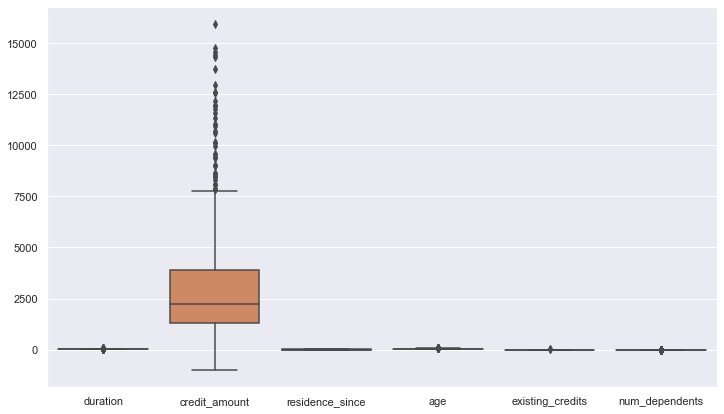

In [10]:
#Есть ли в наборе признаки с выбросами? Какие?
plt.subplots(figsize=(12,7))
sns.boxplot(data=credit_df)
#credit_amount

<AxesSubplot:xlabel='duration'>

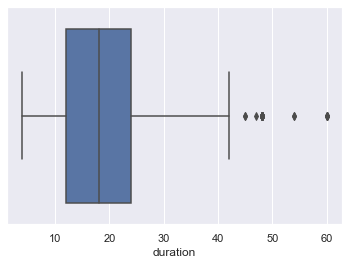

In [11]:
sns.boxplot(x='duration', data=credit_df)

<AxesSubplot:xlabel='num_dependents'>

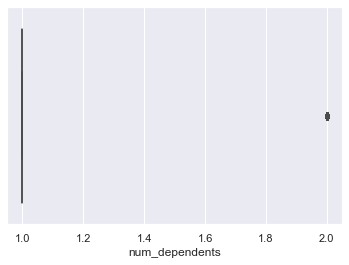

In [12]:
sns.boxplot(x='num_dependents', data=credit_df)

<AxesSubplot:xlabel='existing_credits'>

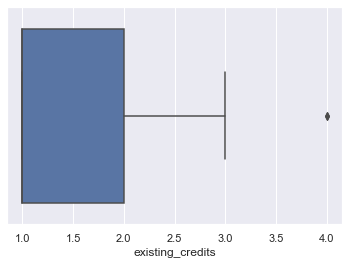

In [13]:
sns.boxplot(x='existing_credits', data=credit_df)

<AxesSubplot:xlabel='age'>

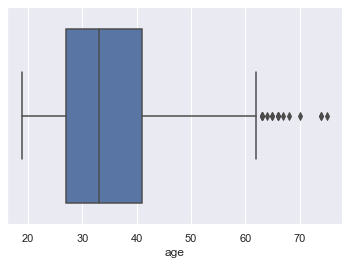

In [14]:
sns.boxplot(x='age', data=credit_df)

<AxesSubplot:xlabel='residence_since'>

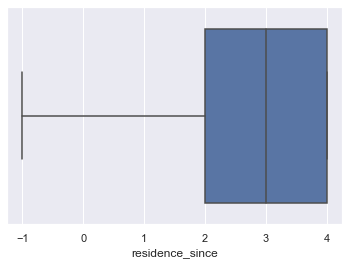

In [15]:
sns.boxplot(x='residence_since', data=credit_df)


<AxesSubplot:xlabel='credit_amount'>

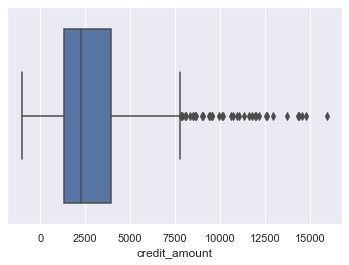

In [16]:
sns.boxplot(x='credit_amount', data=credit_df)

In [17]:
#Сколько пропущенных значений в наборе?
#Кто такой dependent? https://www.irs.gov/help/ita/does-my-childdependent-qualify-for-the-child-tax-credit-or-the-credit-for-other-dependents
#Кажется, их может быть 0
no_zero_columns = list(set(credit_df.columns) - set(['num_dependents']))

In [18]:
(credit_df[no_zero_columns] == 0).sum()
# 0 пропущенных значений

other_parties         0
own_telephone         0
credit_history        0
checking_status       0
class                 0
foreign_worker        0
age                   0
job                   0
existing_credits      0
duration              0
residence_since       0
housing               0
personal_status       0
credit_amount         0
property_magnitude    0
employment            0
dtype: int64

In [19]:
num_columns = list(set(credit_df.columns) -  set(['checking_status','credit_history', 'employment', 'personal_status', 'other_parties', 'property_magnitude', 'housing', 'job', 'own_telephone', 'foreign_worker', 'class']))
credit_df[num_columns].lt(0).sum()

existing_credits    0
duration            0
residence_since     5
num_dependents      0
credit_amount       6
age                 0
dtype: int64

In [20]:
#Значения меньше нуля кажется нам не нужны. Но и нули тоже. Сделаем их NaN
credit_df.loc[:, num_columns] = credit_df[num_columns].mask(credit_df[num_columns] < 0)
credit_df[num_columns].lt(0).sum()

existing_credits    0
duration            0
residence_since     0
num_dependents      0
credit_amount       0
age                 0
dtype: int64

<AxesSubplot:>

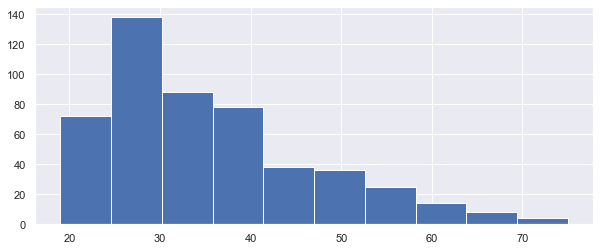

In [21]:
#Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать
credit_df['age'].hist(figsize=(10, 4))

<AxesSubplot:>

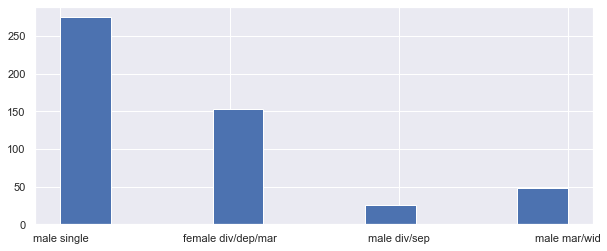

In [22]:
credit_df['personal_status'].hist(figsize=(10, 4))

Text(0, 0.5, 'duration')

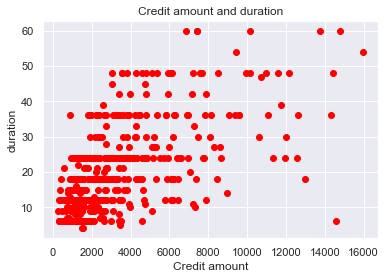

In [23]:
#Проанализируйте взаимосвязи признаков с помощью scatter-plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?
plt.scatter(credit_df['credit_amount'], credit_df['duration'], color='red')
plt.title('Credit amount and duration')
plt.xlabel('Credit amount')
plt.ylabel('duration')

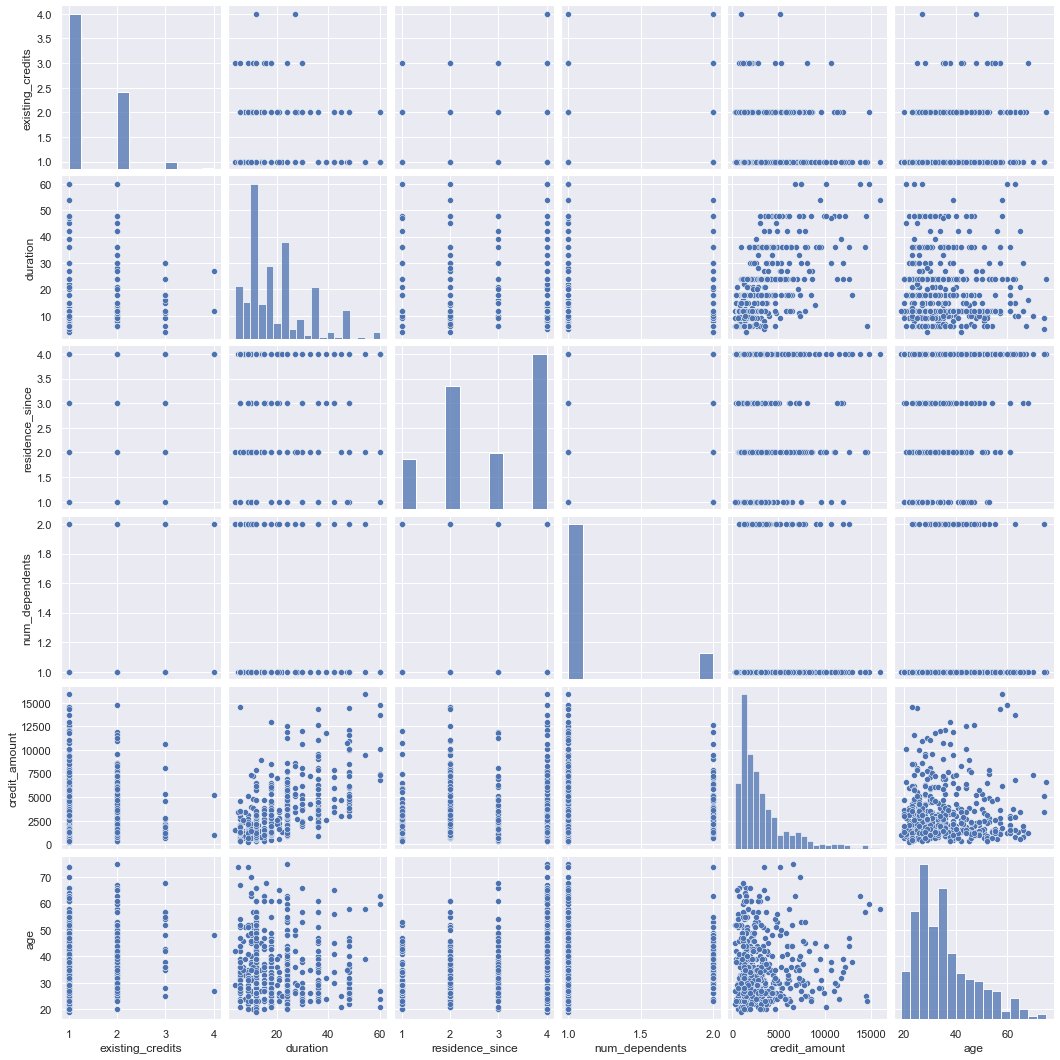

In [24]:
sns.pairplot(credit_df[num_columns])

<AxesSubplot:>

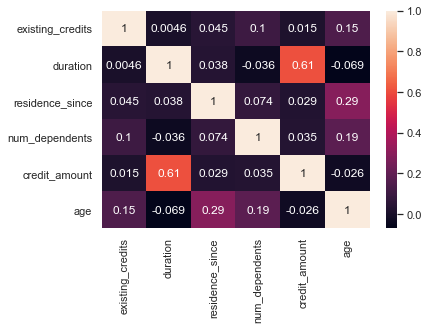

In [25]:
corr_matrix = credit_df[num_columns].corr(method='spearman')
sns.heatmap(corr_matrix, annot=True, annot_kws={"size":12})
# Самые зависимые признаки - credit_amount (количество займа) с duration (длительность кредита)

<AxesSubplot:>

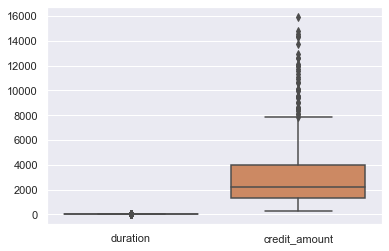

In [26]:
#Какой признак(и) имеет смысл стандартизировать? Почему?
sns.boxplot(data=credit_df[['duration', 'credit_amount']])

<AxesSubplot:>

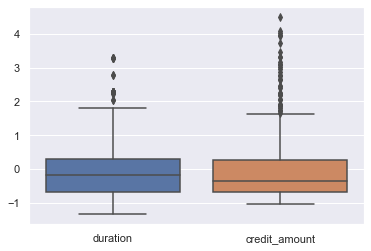

In [27]:
std_scaler = StandardScaler().fit(credit_df[['duration','credit_amount']])
cols_std_scaled = std_scaler.transform(credit_df[['duration','credit_amount']])
new_credit_df = pd.DataFrame(cols_std_scaled, columns = ['duration', 'credit_amount'])
sns.boxplot(data=new_credit_df[['duration', 'credit_amount']])

In [28]:
#Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный
#Судя по данным, они призваны для анализа кредитного рейтинга в банковской сфере
#Можно посмотреть другие критерии кредитного рейтинга:
#Прибыль клиента за последний год
#Наличие работы